<a href="https://colab.research.google.com/github/Rayeesha/Model-Comparison/blob/main/CarPricePrediction_ModelComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

Importing dataset

In [2]:
ds=pd.read_csv("/content/car data.csv")

In [3]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
ds.shape

(301, 9)

In [5]:
ds.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
ds.value_counts("Fuel_Type")

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [8]:
ds.value_counts("Transmission")

,count
Transmission,
Manual,261
Automatic,40


In [9]:
ds.value_counts("Seller_Type")

,count
Seller_Type,
Dealer,195
Individual,106


In [10]:
ds.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2},"Seller_Type":{"Dealer":0,"Individual":1},"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

/tmp/ipython-input-10-3239599588.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2},"Seller_Type":{"Dealer":0,"Individual":1},"Transmission":{"Manual":0,"Automatic":1}},inplace=True)


In [11]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
X=ds.drop(columns=["Selling_Price","Car_Name"],axis=1)
Y=ds["Selling_Price"]

In [13]:
print(X,Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


In [16]:
lr=LinearRegression()

In [17]:
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
train_pred=lr.predict(X_train)
train_err=r2_score(Y_train,train_pred)
print("R square error of training data: ",train_err)

R square error of training data:  0.8799451660493711


Visualize actual & Predicted PRice

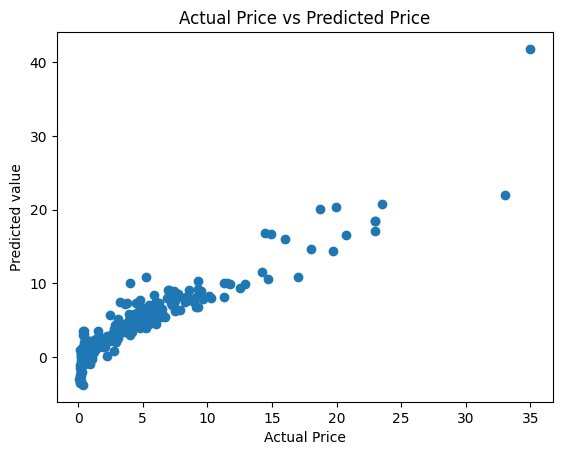

In [19]:
plt.scatter(Y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted value")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [20]:
test_pred=lr.predict(X_test)
test_err=r2_score(Y_test,test_pred)
print("R square error of training data: ",test_err)

R square error of training data:  0.8365766715027051


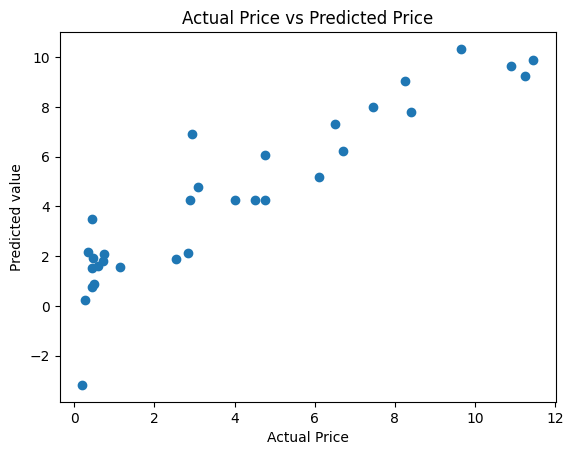

In [21]:
plt.scatter(Y_test,test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted value")
plt.title("Actual Price vs Predicted Price")
plt.show()

Lasso Regression

In [22]:
lasso=Lasso()

In [23]:
lasso.fit(X_train,Y_train)

Lasso()

In [24]:
train_pred=lasso.predict(X_train)
train_err=r2_score(Y_train,train_pred)
print("R square error of training data: ",train_err)

R square error of training data:  0.8427856123435794


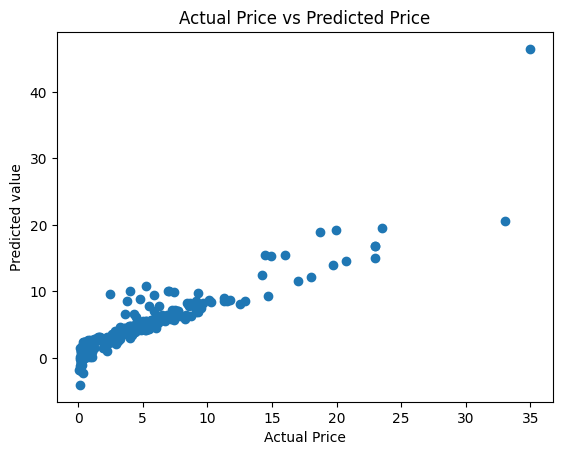

In [25]:
plt.scatter(Y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted value")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [26]:
test_pred=lasso.predict(X_test)
test_err=r2_score(Y_test,test_pred)
print("R square error of training data: ",test_err)

R square error of training data:  0.8709167941173195


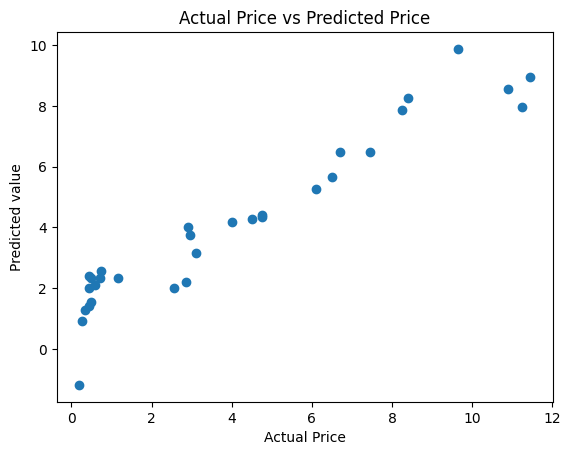

In [27]:
plt.scatter(Y_test,test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted value")
plt.title("Actual Price vs Predicted Price")
plt.show()

XGBRegressor

In [31]:
from xgboost import XGBRegressor

In [32]:
xg=XGBRegressor()

In [33]:
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
train_pred=xg.predict(X_train)
train_err=r2_score(Y_train,train_pred)
print("R square error of training data: ",train_err)

R square error of training data:  0.9999896680984235


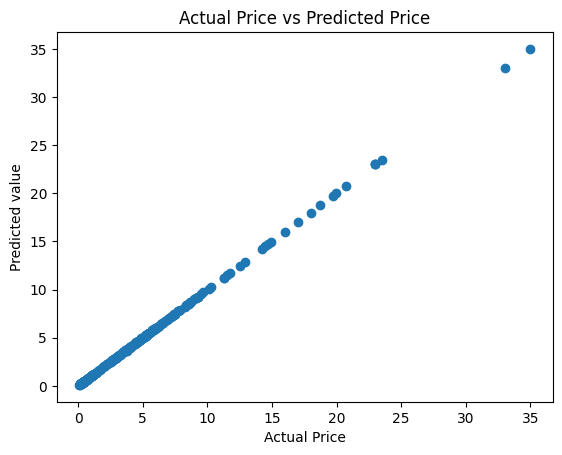

In [35]:
plt.scatter(Y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted value")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [38]:
test_pred=xg.predict(X_test)
test_err=r2_score(Y_test,test_pred)
print("R square error of testing data: ",test_err)

R square error of testing data:  0.9807321370840111


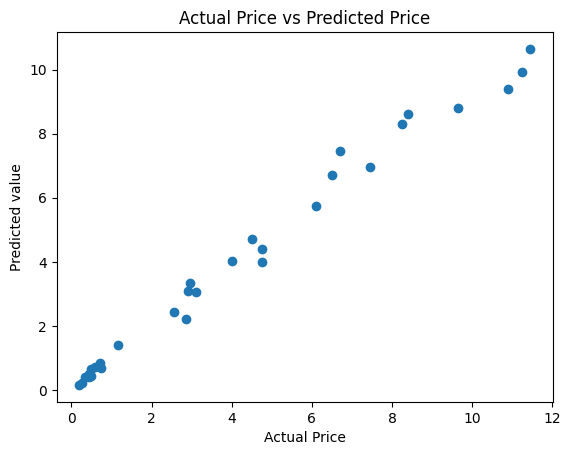

In [37]:
plt.scatter(Y_test,test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted value")
plt.title("Actual Price vs Predicted Price")
plt.show()